# Machine Learning for Leakage Detection from Hydrocarbon Wells

**This work has been done by Mehdi Rezvandehy, Data scientist at University of Calgary. The results of this work is in process of publication for a scientific journal. Real data set and new developed codes are removed from this script. The completed script will be uploaded when the paper gets published.**

# Introduction 

Expansion in exploitation of oil and gas reserves has raised public concern regarding contamination of soil and underground water resources, and increase in greenhouse gas emission . Gas such as methane, sequestered CO2 and/or any liquid or combination can migrate and leak from wellbores to  water aquifers, ground surface and atmosphere. Leakage pathways may exist along and through boreholes. The presence of such fluid pathways is a significant environmental issue. Regular field monitoring should be applied to detect serious leakage through exiting oil and gas wells: leakiest wells should be prioritized for amendment.

The Alberta Energy Regulator (AER) in Alberta, Canada, operates such field tests for energy wells within the province. The AER applies two field tests for identification of fluid migration after a well is completed to produce hydrocarbon or to inject any fluid: 1- Surface casing vent flow (**SCVF**) is the flow of gas (methane, CO2..) or liquid or any combination out of the casing annulus or surface casing. SCVF is often referred to as internal migration. 2- Gas Migration (**GM**) is a flow of any gas that is detectable at surface outside of the outermost casing string. GM is often referred to as seepage or external migration. The challenge is there are many wells in producing (and injecting) areas. Efficient and cost-effective testing operation for all wells is impossible.

The main objectives of this work are to 1- imputing missing data with a new bootstrapping technique that respect the correlation between variables with uncertainty quantification, 2- predicting Seriousness of the leakages based on relevant properties of the wells with positive SCVF/GM within the entire Alberta, Canada 3- Applying several predicting models and integration of some promising machine learning and deep learning techniques (ensemble) to enhance efficiency of prediction. 


## Predictive Algorithms 

We consider a wide range of machine learning and deep learning algorithms from basic to sophisticated ones and an amalgamation in ensemble learning. A brief explanation of each is as follows:

**Stochastic Gradient Descent (SGD)** is a good place to start for large data set. Gradient descent is a general idea to minimize a cost function by iteratively tweaking parameters. It has a wide range of application to find optimal solutions for many problems. It computes the gradient of the cost function regarding model parameters and update the parameters through iteration until a global minimum of cost function is reached. Gradient Descent (and mini-batch) can be very slow for large data set. SGD is efficient in case of large data set because it just picks a random instance at every iteration and computes the gradients based only on that single instance.
	
**Logistic Regression (LR)** is a simple approach to estimate the probability of a particular class. It calculates a weighted sum of the input features (plus a bias term) and use sigmoid function to estimate probability of each class. It has been commonly used for medical science and health, and failure detection in engineering.
	
**Support Vector Machine (SVM)** is a powerful algorithm to perform linear or nonlinear classification. It is highly preferred since it produces reliable accuracy with less computation power. The fundamental idea is to have the largest possible margin between the classes. It predicts the class of a new instance by computing a decision function with optimum parameters.
	
**Decision Tree (DT)** and **Random Forest (RF)** are among the most versatile and reliable Machine Learning algorithms for non-linear and complex data. DT is the fundamental component of RF. DT is applied based on a flowchart structure in which each node denotes a test, each branch represents the result of the test, and each leaf node represents a class label. The RF randomly creates and merges multiple decision trees and predict a class that gets the most votes among all trees. Despite its simplicity, Random Forest is one of the most powerful Machine Learning algorithms available today.
	
**Adaptive Boosting (AB)** can be applied for any predictor mentioned above to enhance the performance and turn into a strong learner. The general idea is to use a base classifier and apply on training set first, then correct base classifier by paying attention to the training instances that are underfitted. This leads to a new classifier focusing more on the hard cases. The process of training a classifier repeated sequentially, each classifier trying to correct its predecessor. More robust classifier may be achieved by this sequential learning.
	
**Deep Neural Network (DNN)** is a specific subfield of machine learning for tackling a very complex problem. In comparison with shallow learning or artificial neural networks, deep learning usually involves much more successive layers of representations that are learned from training data. The large network's architecture may lead to some problems such as vanishing/exploding gradients, overfitting, computational cost and slow training. However, these problems can be resolved by tunning some hyperparameters. Deep Learning has been recently applied in many disciplines including computer vision, speech recognition, natural language processing, audio recognition and so on.
	
**Ensemble Learning (EL)** usually applies near the end of project when a few good and promising predictors are built to integrate them into a even stronger predictor. It works by aggregating the predictions of a group of predictors. Random Forest and Adaptive Boosting can be categorized as EL. A very simple EL is hard voting (HV) that aggregates the predictions of each classifier and predict the class that gets the most votes. Soft voting (SV) is another EL that works by averaging the probability of each class and predict a class with the highest probability. It often achieves higher performance than HV due to giving more weight to highly confident votes. Instead of using simple functions to aggregate the predictions of all predictors, staking approach (SA) trains a model to perform this aggregation. The final predictor takes these predictions as inputs and makes the final prediction. EL may lead to even better prediction than the best individual if predictors are independent from each other.

The same data sets are applied for all the models in order to have a consistent comparison and find the optimum predictor.

## Performance Measurement 

The final step is to evaluate the performance of each algorithm. Evaluating a classifier is often more challenging than a regressor. The most common approach for assessment is
accuracy, which is calculated by number of true predicted over total number of data. K-fold cross-validation can be applied to achieve more reliable accuracy: it splits the training set into K-folds, then calculating accuracy of each fold using a model trained on the remaining folds. However, accuracy is not generally recommended for performance measurement of classifiers, especially in cease of skewed datasets. Accuracy should be considered along with other metrics. **Confusion matrix** is a much better way to evaluate the performance of a classifier. The general idea is to consider the number of times instances of negative class are misclassified as positive class and vice versa. A set of prediction is required to calculate confusion matrix. **K-fold cross-validation is applied to get a clean prediction**. In a confusion matrix, each column represents a predicted class, while each row signifies an actual class. So, the lower values for off-diagonal elements of a covariance matrix, the higher performance of the classifier. Although the confusion matrix represents a lot of information, sometimes more concise metric is preferred. 

**Precision=$\frac{TP}{TP+FP}$**: is the accuracy of the positive. Precision is typically used with another metric called **sensitivity=$\frac{TP}{TP+FN}$**. The final metric that can be achieved from confusion matrix is **specificity=$\frac{TN}{TN+FP}$** which is the proportion of negative classes that are correctly identified.

**TN**: True Negative, **FP:** False Positive
**FN:** False Negative, **TP:** True Positive


In [3]:
import sys
import sklearn
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.mlab as ml
import matplotlib as mpl
from IPython.display import clear_output
import statistics
import os
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from matplotlib.offsetbox import AnchoredText
import random
import utm
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib import gridspec
import matplotlib.patheffects as pe
import pprint
import scipy
from IPython.display import clear_output
# to make this notebook's output stable across runs
np.random.seed(42)
import scipy.linalg 
import scipy.stats as ss
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import geostatspy.GSLIB as GSLIB                        
import geostatspy.geostats as geostats 
from scipy.stats import norm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [36]:
# Reading Data
df_xy = pd.read_csv("Final_Final.csv",na_values=['NA','?',' '])

# Shuffle data
np.random.seed(42)
df_xy=df_xy.reindex(np.random.permutation(df_xy.index))
df_xy.reset_index(inplace=True, drop=True)

# Drop x and y coordinate since they are only used for ploting. Hence, we have two different data:
# one with x and y, and another without x and y
df=df_xy.copy()
drop_colmn=['X Coordinate','Y Coordinate'] # x and y coordinate is used only for plotting
df.drop(drop_colmn, axis=1, inplace=True)
df

Measured Depth (m)  Surface-Casing Depth (m)  Surface-Casing Size (mm)  \
0                  1056.0                     161.8                     177.8   
1                  3950.0                     436.0                     339.7   
2                  1562.0                     320.0                     244.5   
3                  1700.0                     710.0                     244.5   
4                  1249.0                     227.0                     177.8   
...                   ...                       ...                       ...   
27358              2260.0                     405.0                     219.1   
27359               593.0                     182.0                     177.8   
27360              1810.0                     320.0                     244.5   
27361               640.1                     188.7                     177.8   
27362              1056.7                     110.0                     219.1   

       Surface-Casing Weight (kg/m)  Production-Casing Depth (m)  \
0                              25.3                       1055.0   
1                              81.1                          NaN   
2                              48.1                          NaN   
3                              48.1                       1700.0   
4                              29.8                       1249.0   
...                             ...                          ...   
27358                          35.7                       2259.0   
27359                           NaN                        591.1   
27360                          48.1                       1810.0   
27361                           NaN                        640.1   
27362                           NaN                       1056.1   

       Production-Casing Size (mm)  Production-Casing Weight (kg/m)  \
0                            114.3                             14.1   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                            139.7                             23.1   
4                            114.3                             14.1   
...                            ...                              ...   
27358                        139.7                             25.3   
27359                        114.3                              NaN   
27360                        177.8                             34.3   
27361                        114.3                              NaN   
27362                        114.3                              NaN   

       Rheology Modifier (RM)  Borehole Temperature (degC) Well Status  ...  \
0                       1.286                          NaN         AGZ  ...   
1                       0.039                        126.0          AG  ...   
2                       2.465                         59.0         D&A  ...   
3                       1.300                         41.0          PO  ...   
4                       1.195                         35.0         AZN  ...   
...                       ...                          ...         ...  ...   
27358                   0.590                         62.0         AOZ  ...   
27359                     NaN                          NaN          FG  ...   
27360                   1.900                         60.0          SG  ...   
27361                   1.370                         27.0         D&A  ...   
27362                   3.750                         27.0         AOZ  ...   

      Last 12 Month Total GAS (e3m3)  Last 12 Month Total WATER (m3)  \
0                               73.0                           157.0   
1                             4809.0                            31.0   
2                                NaN                             NaN   
3                               17.0                           223.0   
4                                NaN                   

In [37]:
# Filter 'Considered Non Serious' from data set 
df_xy_=df_xy[df_xy['AER Classification']!='Considered Non Serious']
count=df_xy_['AER Classification'].value_counts()
ind_Serious=[index for index, value in enumerate(df_xy_['AER Classification']) if value == 'Serious']
ind_Non_Serious=[index for index, value in enumerate(df_xy_['AER Classification']) if value == 'Non Serious']

# print number of 'Serious' and 'Non Serious' well
print(count)

Non Serious    20298
Serious         4598
Name: AER Classification, dtype: int64


## Location Map 

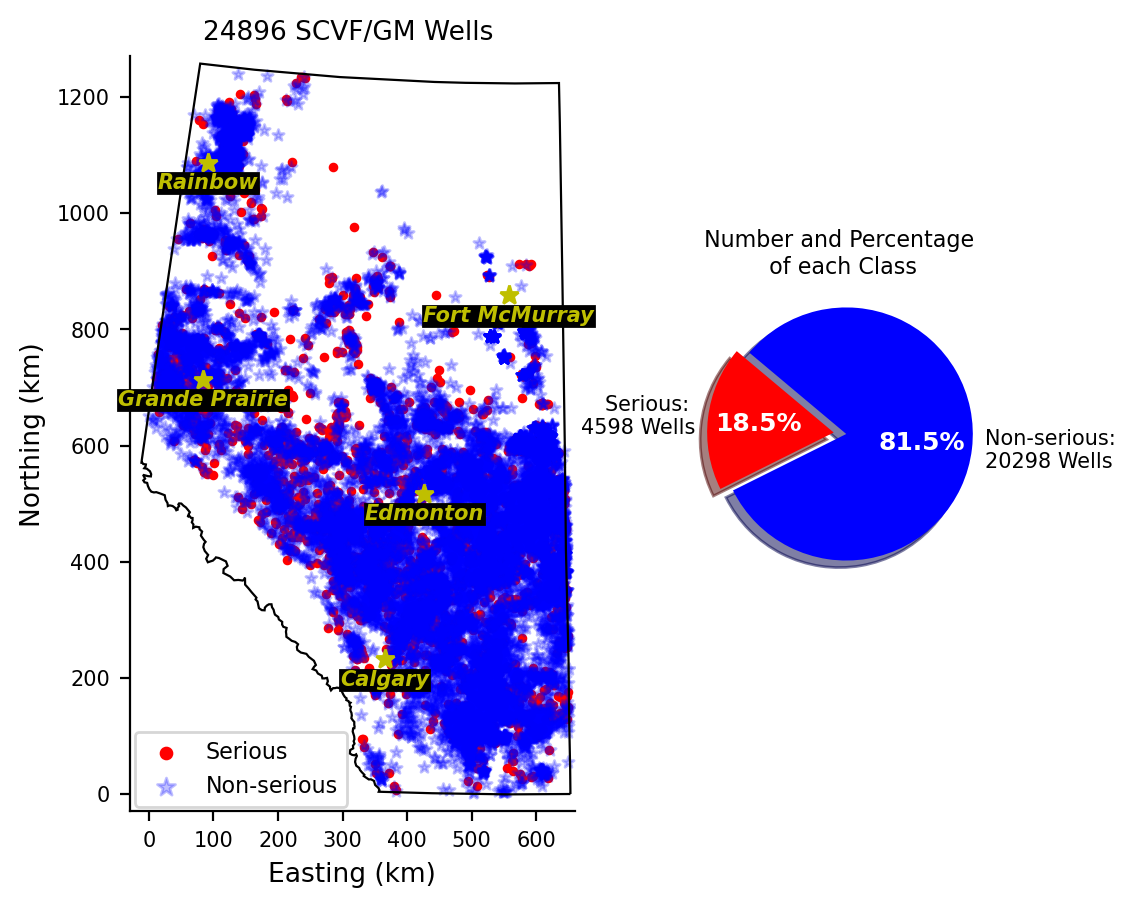

In [38]:
#Plot for Serious
x_1=list((df_xy_["X Coordinate"].iloc[ind_Serious])/1000)
y_1=list((df_xy_["Y Coordinate"].iloc[ind_Serious])/1000) 
count_1=len(df["AER Classification"].iloc[ind_Serious])

#Plot for Non Serious
x_2=list((df_xy_["X Coordinate"].iloc[ind_Non_Serious])/1000)
y_2=list((df_xy_["Y Coordinate"].iloc[ind_Non_Serious])/1000) 
count_0=len(df_xy_["AER Classification"].iloc[ind_Non_Serious])

# Plot location map and pie chart
loc_pie_plot(x_1, y_1, x_2, y_2, count_0, count_1,title= str(len(df_xy_))+
             " SCVF/GM Wells ",s1=6,s2=18,alpha1=1,alpha2=0.25,save=None)

## Number of Missing Values of Raw Data

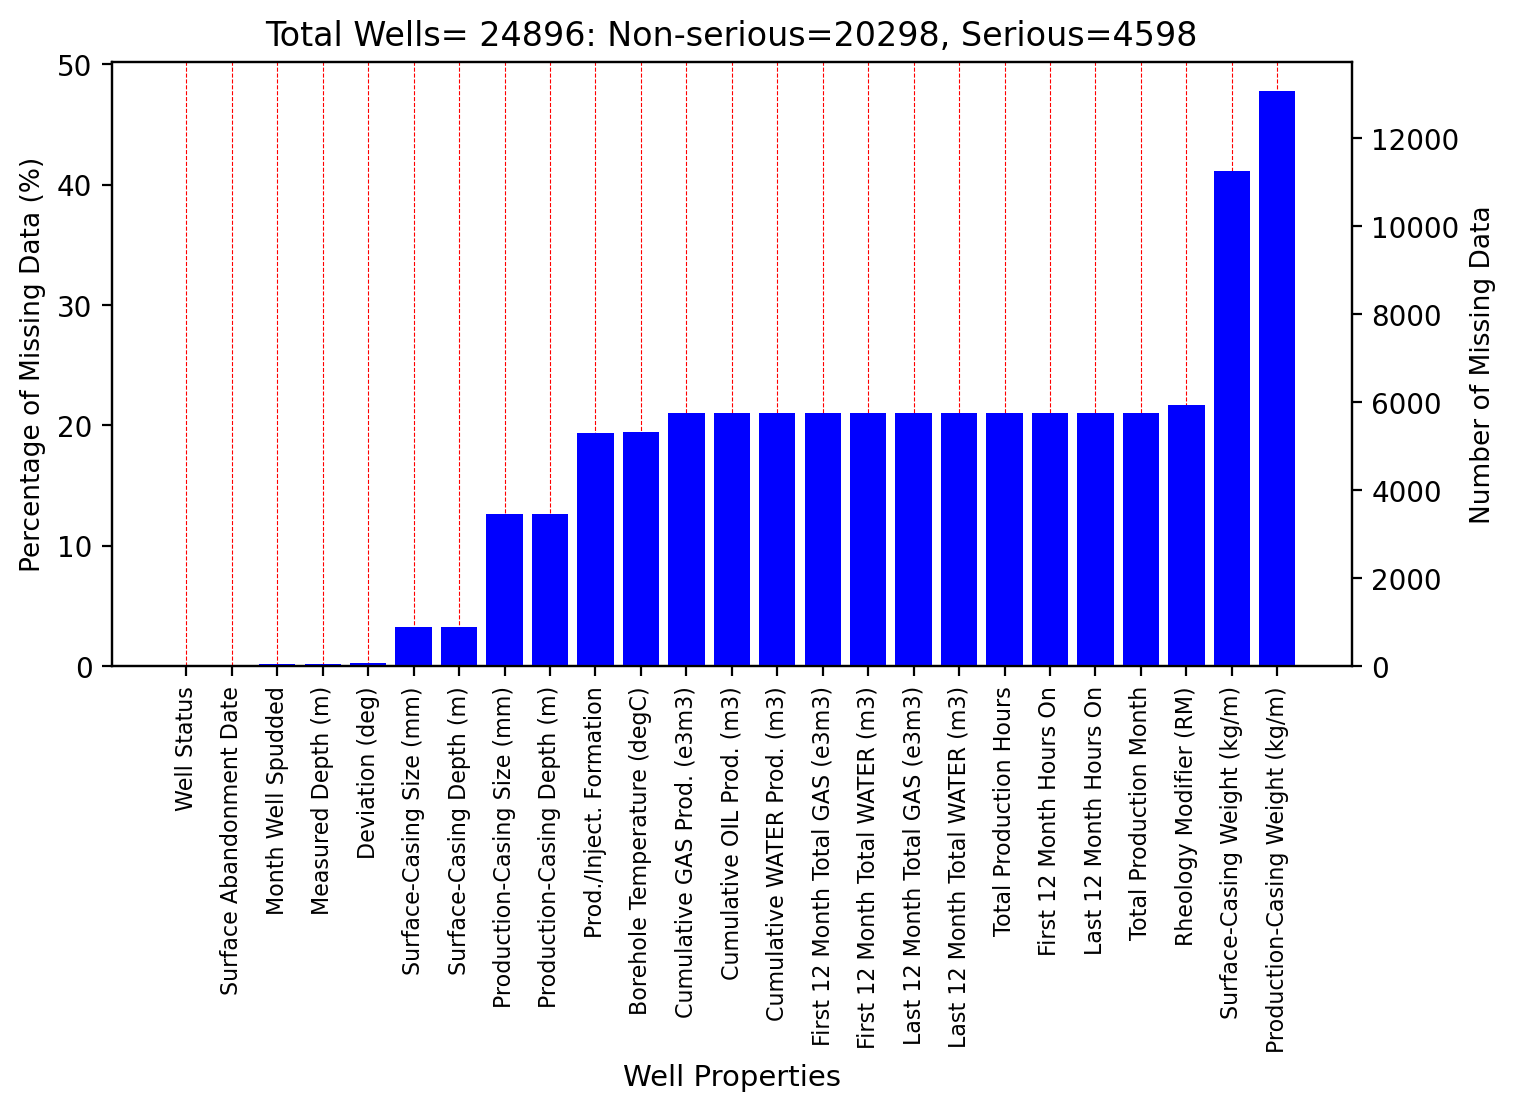

In [39]:
#Calculate number of missing data and percentage for each feature
per_non_nan=[]
non_nan_=[]
df_=df.copy()
df_.drop(['AER Classification'], axis=1, inplace=True)

Colms=df_.columns
for i in range(len(Colms)):
    non_nan=df_[Colms[i]].count()
    non_nan_.append(len(df_)-non_nan)
    per_non_nan.append(float(100-(non_nan/len(df_))*100))
    
#Sort percentage of missing data and columns   
sort_array=np.sort(per_non_nan)
sort_colms=[]
uniqu=list(np.unique(per_non_nan))
for i in range(len(uniqu)):
    ind=[j for j, x in enumerate(per_non_nan) if x == uniqu[i]]
    for k in ind:
        sort_colms.append(Colms[k])
        
#Sort number of missing data and columns        
sort_non_nan_=np.sort(non_nan_)
sort_non_nan__=[]
uniqu=list(np.unique(non_nan_))
for i in range(len(uniqu)):
    ind=[j for j, x in enumerate(non_nan_) if x == uniqu[i]]
    for k in ind:
        sort_non_nan__.append(Colms[k])

#Plot barchart with two vertical axis        
font = {'size'   : 10}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis
index1 = np.arange(len(sort_colms))
index2 = np.arange(len(sort_non_nan__))
ax1.bar(index1, sort_array,color='b')
ax2.bar(index2, sort_non_nan_,color='b')
plt.title('Total Wells= '+str(count_0+count_1)+': Non-serious='+str(count_0)+', Serious='+str(count_1),fontsize=12)
ax1.set_xlabel('Well Properties',fontsize='10.5')
ax1.set_ylabel('Percentage of Missing Data (%)',fontsize='9.5')
ax2.set_ylabel('Number of Missing Data',fontsize='9.5')
ax1.set_xticks(np.arange(len(Colms)))
ax1.set_xticklabels(sort_colms,fontsize=8, rotation=90)
ax1.xaxis.grid(color='r', linestyle='--', linewidth=0.4) # horizontal lines
#fig.savefig('D:\Paper 6\Figures\Fig4.pdf', dpi=500, bbox_inches='tight')

plt.show()

# Ratio Equalization 

In [40]:
#Drop NA (missing) rows
df_nan=df.copy()
col=df_nan.columns
df_nan=df_nan.dropna(subset=list(col)) 
nonan=list(df_nan.index)

# Retrieve wells classified as "Serious" no matter there missing values or not
num=0
ind_=[]
for i in range(len(df)):
    if(df['AER Classification'][i]=='Serious'):
        ind_.append(i)
        
# Retrieve wells classified as "Non Serious" if there is no missing value.       
for i in range(len(df)):        
      if(df['AER Classification'][i]=='Non Serious'):    
        try:
            num=num+1
            if(num==count[1]): break              
        except ValueError:
            pass # do nothing!             

# Calculate number of missing values for each row        
Num_nan=df.isnull().sum(axis=1).tolist()

# Choose number of wells classified as 'Non Serious' to have as low missing value as possible
# to the point that the number of wells classified as 'Non Serious' is equal with wells classified as 'Serious'
ind=list([i for i in range(len(Num_nan)) if Num_nan[i]==1])
j=1
while num<count[1]:
    for k in range(len(ind)):
        if(df['AER Classification'][ind[k]]=='Non Serious'): 
            if(ind[k] in ind_):
                pass
            else:
                ind_.append(ind[k])
                j=j+1    
    ind=list([i for i in range(len(Num_nan)) if Num_nan[i]==j])   

df=df.iloc[ind_,:]
df=df.reset_index(drop =True)
#
df_xy=df_xy.iloc[ind_,:]
df_xy=df_xy.reset_index(drop =True)

# print number of 'Serious' and 'Non Serious' well
count=df_xy['AER Classification'].value_counts()
print(count)

Serious        4598
Non Serious    4598
Name: AER Classification, dtype: int64


In [41]:
# Drop 'Considered Non Serious' and replace 'Serious' with 1
# and 'Non Serious' with 0. These are target values to predict: Binary AER Classification.

df_xy_=df_xy[df_xy['AER Classification']!='Considered Non Serious']
df_xy['AER Classification']=df_xy['AER Classification'].replace('Non Serious', 0)
df_xy['AER Classification']=df_xy['AER Classification'].replace('Serious', 1)
#
df=df[df['AER Classification']!='Considered Non Serious']
df['AER Classification']=df['AER Classification'].replace('Non Serious', 0)
df['AER Classification']=df['AER Classification'].replace('Serious', 1)

In [42]:
# Calculate parameters for plotting
count=df_xy['AER Classification'].value_counts()
ind_Serious=[index for index, value in enumerate(df['AER Classification']) if value == 1]
ind_Non_Serious=[index for index, value in enumerate(df['AER Classification']) if value == 0]
count

1    4598
0    4598
Name: AER Classification, dtype: int64

## Location Map 

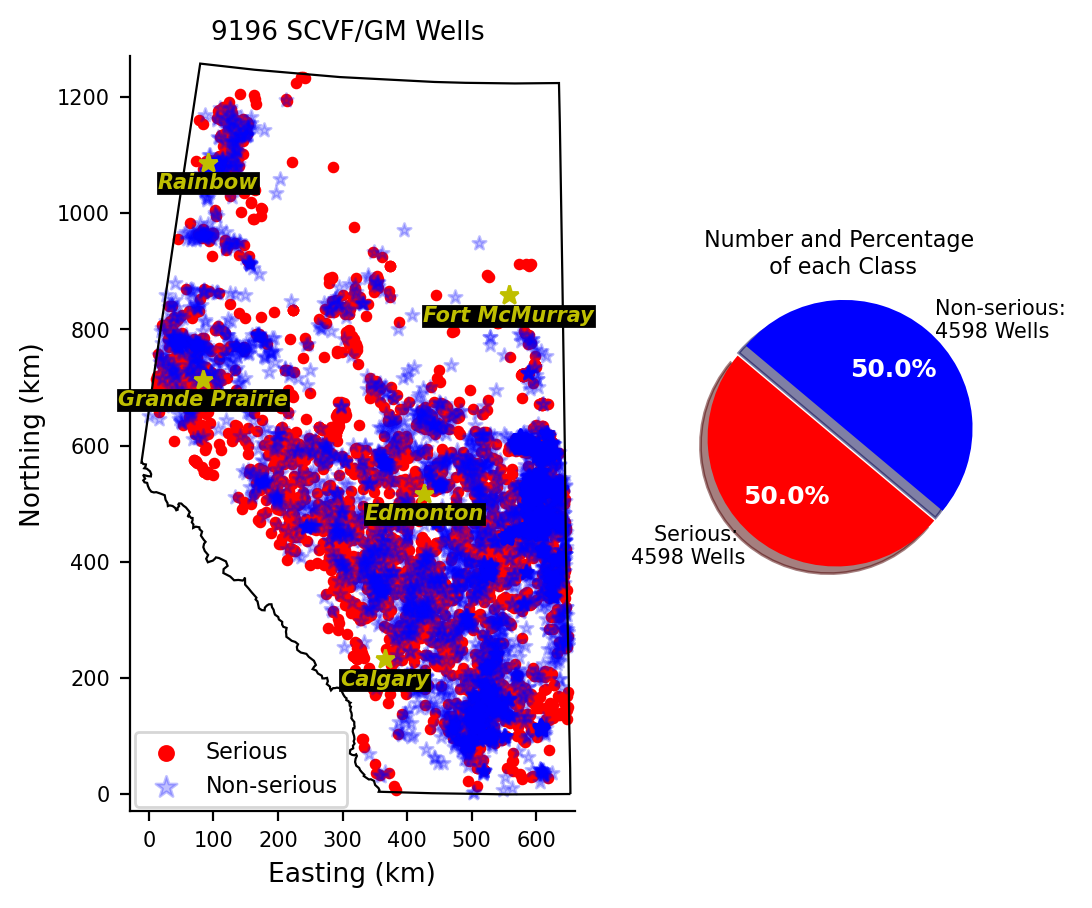

In [44]:
#Serious
x_1=list((df_xy["X Coordinate"].iloc[ind_Serious])/1000)
y_1=list((df_xy["Y Coordinate"].iloc[ind_Serious])/1000) 
count_1_E=len(df["AER Classification"].iloc[ind_Serious])

#Non Serious
x_2=list((df_xy["X Coordinate"].iloc[ind_Non_Serious])/1000)
y_2=list((df_xy["Y Coordinate"].iloc[ind_Non_Serious])/1000) 
count_0_E=len(df_xy["AER Classification"].iloc[ind_Non_Serious])

# Plot location map and pie chart
loc_pie_plot(x_1, y_1, x_2, y_2, count_0_E, count_1_E,title= str(len(df))+
             " SCVF/GM Wells ",s1=10,s2=25,alpha1=1,alpha2=0.25,save=None)

## Number of Missing Values for Equalized Ratio Data

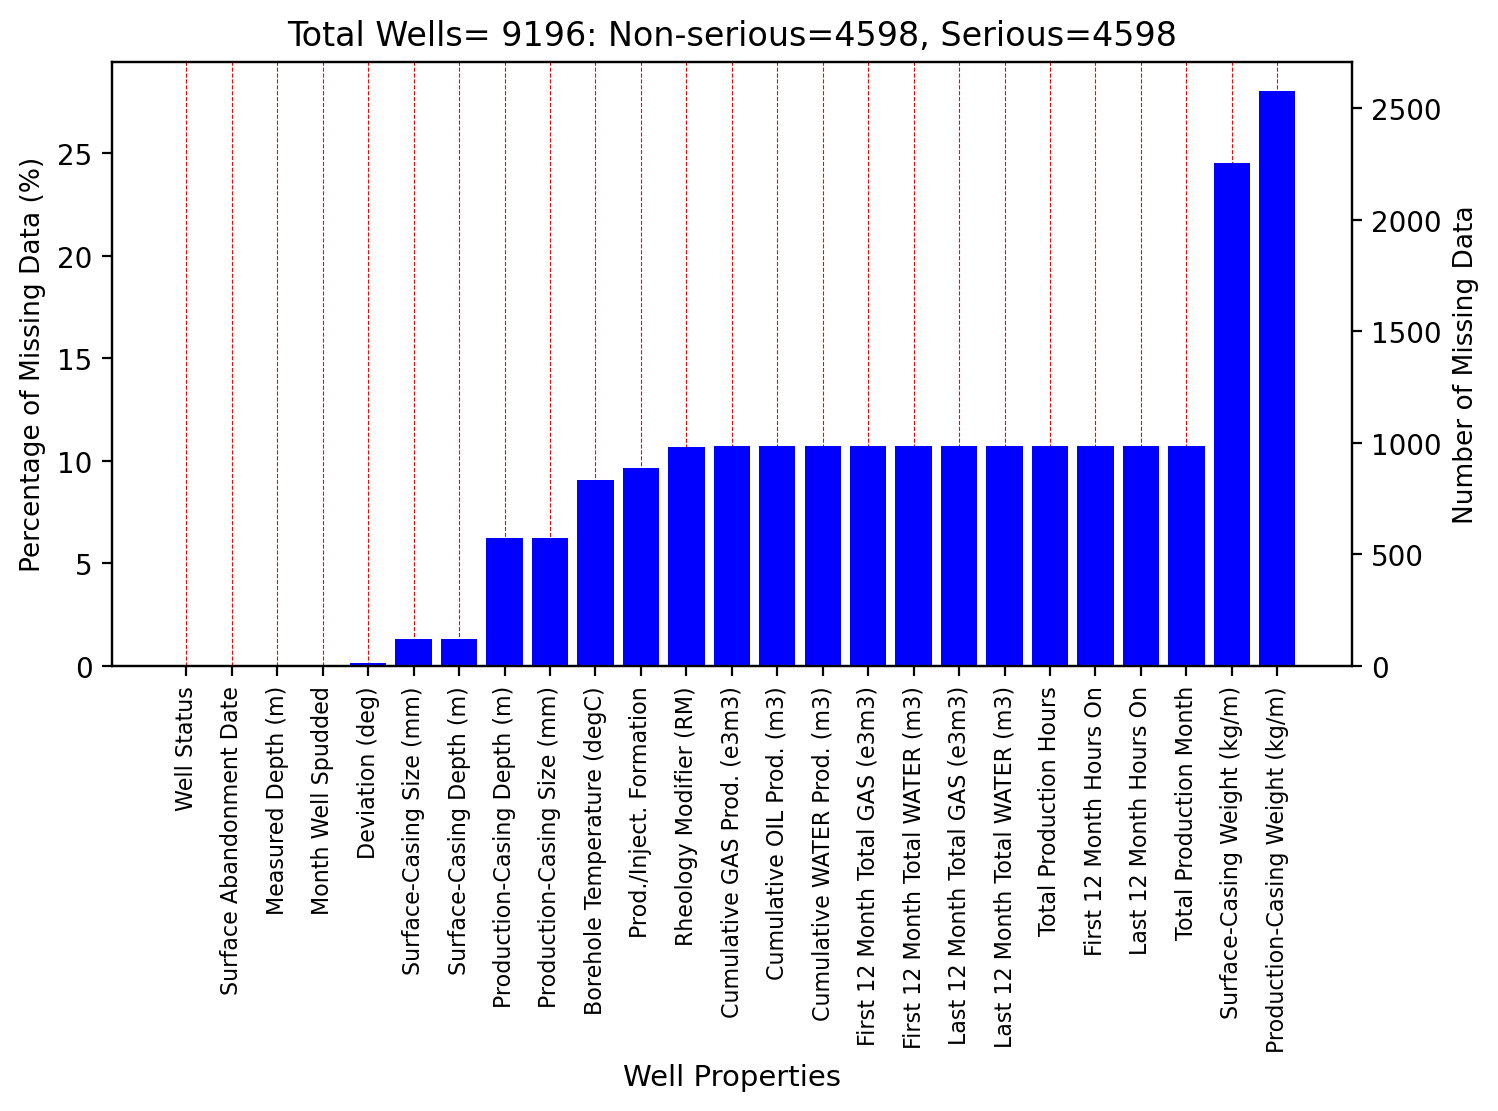

In [45]:
#Calculate number of missing data and percentage for each feature
per_non_nan=[]
non_nan_=[]
df_E=df.copy()
df_E.drop(['AER Classification'], axis=1, inplace=True)

Colms=df_E.columns
for i in range(len(Colms)):
    non_nan=df_E[Colms[i]].count()
    non_nan_.append(len(df_E)-non_nan)
    per_non_nan.append(float(100-(non_nan/len(df_E))*100))
    
#Sort percentage of missing data and columns   
sort_array=np.sort(per_non_nan)
sort_colms=[]
uniqu=list(np.unique(per_non_nan))
for i in range(len(uniqu)):
    ind=[j for j, x in enumerate(per_non_nan) if x == uniqu[i]]
    for k in ind:
        sort_colms.append(Colms[k])
        
#Sort number of missing data and columns        
sort_non_nan_=np.sort(non_nan_)
sort_non_nan__=[]
uniqu=list(np.unique(non_nan_))
for i in range(len(uniqu)):
    ind=[j for j, x in enumerate(non_nan_) if x == uniqu[i]]
    for k in ind:
        sort_non_nan__.append(Colms[k])

#Plot barchart with two vertical axis        
font = {'size'   : 10}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k')

ax2 = ax1.twinx() # Create another axes that shares the same x-axis
index1 = np.arange(len(sort_colms))
index2 = np.arange(len(sort_non_nan__))
ax1.bar(index1, sort_array,color='b')
ax2.bar(index2, sort_non_nan_,color='b')
ax1.set_xlabel('Well Properties',fontsize='10.5')
plt.title('Total Wells= '+str(count_0_E+count_1_E)+': Non-serious='+str(count_0_E)+', Serious='+str(count_1_E),fontsize=12)
ax1.set_ylabel('Percentage of Missing Data (%)',fontsize='9.5')
ax2.set_ylabel('Number of Missing Data',fontsize='9.5')
ax1.set_xticks(np.arange(len(Colms)))
ax1.set_xticklabels(sort_colms,fontsize=8, rotation=90)
ax1.xaxis.grid(color='r', linestyle='--', linewidth=0.4) # horizontal lines
#fig.savefig('D:\Paper 6\Figures\Fig5.pdf', dpi=500, bbox_inches='tight')

plt.show()

## Correlation between features

The features 'Well Status Abrv' and 'Oldest Fm Drilled' that have text categories should be converted to the number before using in Machine Learning Algorithm. We could just use numbers 0,1,2... for each category. We can also encode more information than just that. We could consider what the mean target value is for each categories. This is called **Target Encoding**.

We should be careful about using this approach since we are now using the target value for training. This may lead to  potentially overfitting. The possibility of overfitting is even greater if there are a small number of a specific category. We can use a weighting factor to prevent overfitting. If the weight is higher than the number of a small category, the value of the category will tend towards the overall average of target. 

However, we have not used it in this work since there are many categories for each feature that can lead to high overfitting.

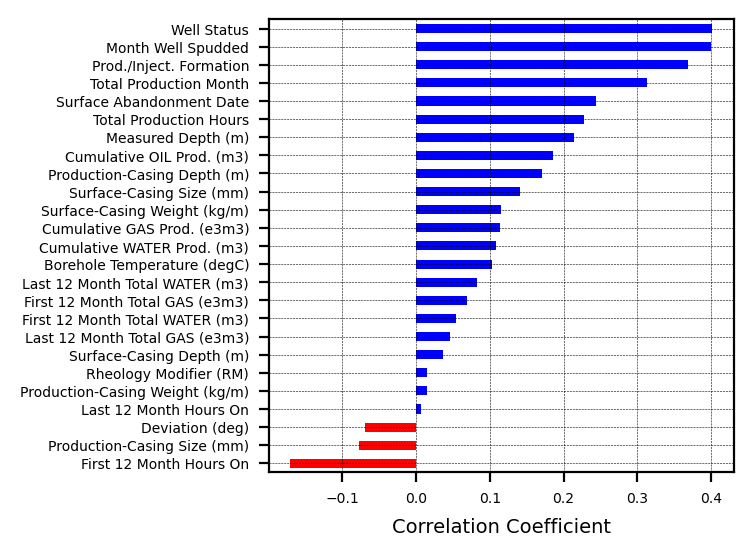

In [48]:
# Calculate correlation between features
corr=df.corr()
Colms_sh=list(Colms)

# Plot correlation of all features with the target 'AER Classification'
font = {'size'   : 5}
matplotlib.rc('font', **font)
corr_arr=corr.values[:,-1]

fig, ax1 = plt.subplots(figsize=(3, 3), dpi= 200, facecolor='w', edgecolor='k')

coefs=corr_arr[0:-1]; names=Colms_sh
r_ = pd.DataFrame( { 'coef': coefs, 'positive': coefs>=0  }, index = names )
r_ = r_.sort_values(by=['coef'])
r_['coef'].plot(kind='barh', color=r_['positive'].map({True: 'b', False: 'r'}))   

ax1.set_xlabel('Correlation Coefficient',fontsize='7')
#ax1.set_ylabel('Well Properties',fontsize='7')
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.2) # horizontal lines
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.2) # horizontal lines
plt.show()

Since target values 'AER Classification' is only 0 and 1, the linear correlation of target and features could be misleading: features may be correlated with target non-linearly. Hence, we consider the correlation between features, A variable may be non-linearly is correlated with target but it can be linearly correlated with other features. Here is covariance matrix between all features.

In [49]:
# Calculate covariance matrix between features and percentage of missing values as matrix 

colmn=list(df_xy.columns)
corr=zeros((len(colmn),len(colmn)))
corr_nxy=zeros((len(colmn)-2,len(colmn)-2))
Per_NaN=zeros((len(colmn)-2,len(colmn)-2))
xy_dic_no_im={}
# we do not need x and y, these features are only used for location map plot 
ll=0; itest=0
for l in range(len(colmn)):
    tmpx=[] ;tmpy=[]
    if(colmn[l]!='X Coordinate' and colmn[l]!='Y Coordinate'):
        ll=ll+1; ll1=0
    for l1 in range(len(colmn)):
        if(colmn[l1]!='Y Coordinate' and colmn[l1]!='X Coordinate'):
            ll1=ll1+1 
        tt=np.corrcoef(New_pd_[:,0],New_pd_[:,1])
        #
        if(l==l1): corr[l,l1]=tt[0,1]
        else: corr[l,l1]=tt[0,1]  
        #
        if(ll>=ll1 and colmn[l]!='X Coordinate' and colmn[l]!='Y Coordinate'
         and colmn[l1]!='Y Coordinate' and colmn[l1]!='X Coordinate'):
            if(ll==ll1): corr_tmp=tt[0,1]+0.05
            else: corr_tmp=tt[0,1]              
            corr_nxy[ll-1,ll1-1]=np.nan
            corr_nxy[ll1-1,ll-1]=corr_tmp
            Per_NaN[ll-1,ll1-1]=100-(len(New_pd_[:,0])/len(df_xy))*100   
            Per_NaN[ll1-1,ll-1]=np.nan         

## Correlation Matrix before Imputation 

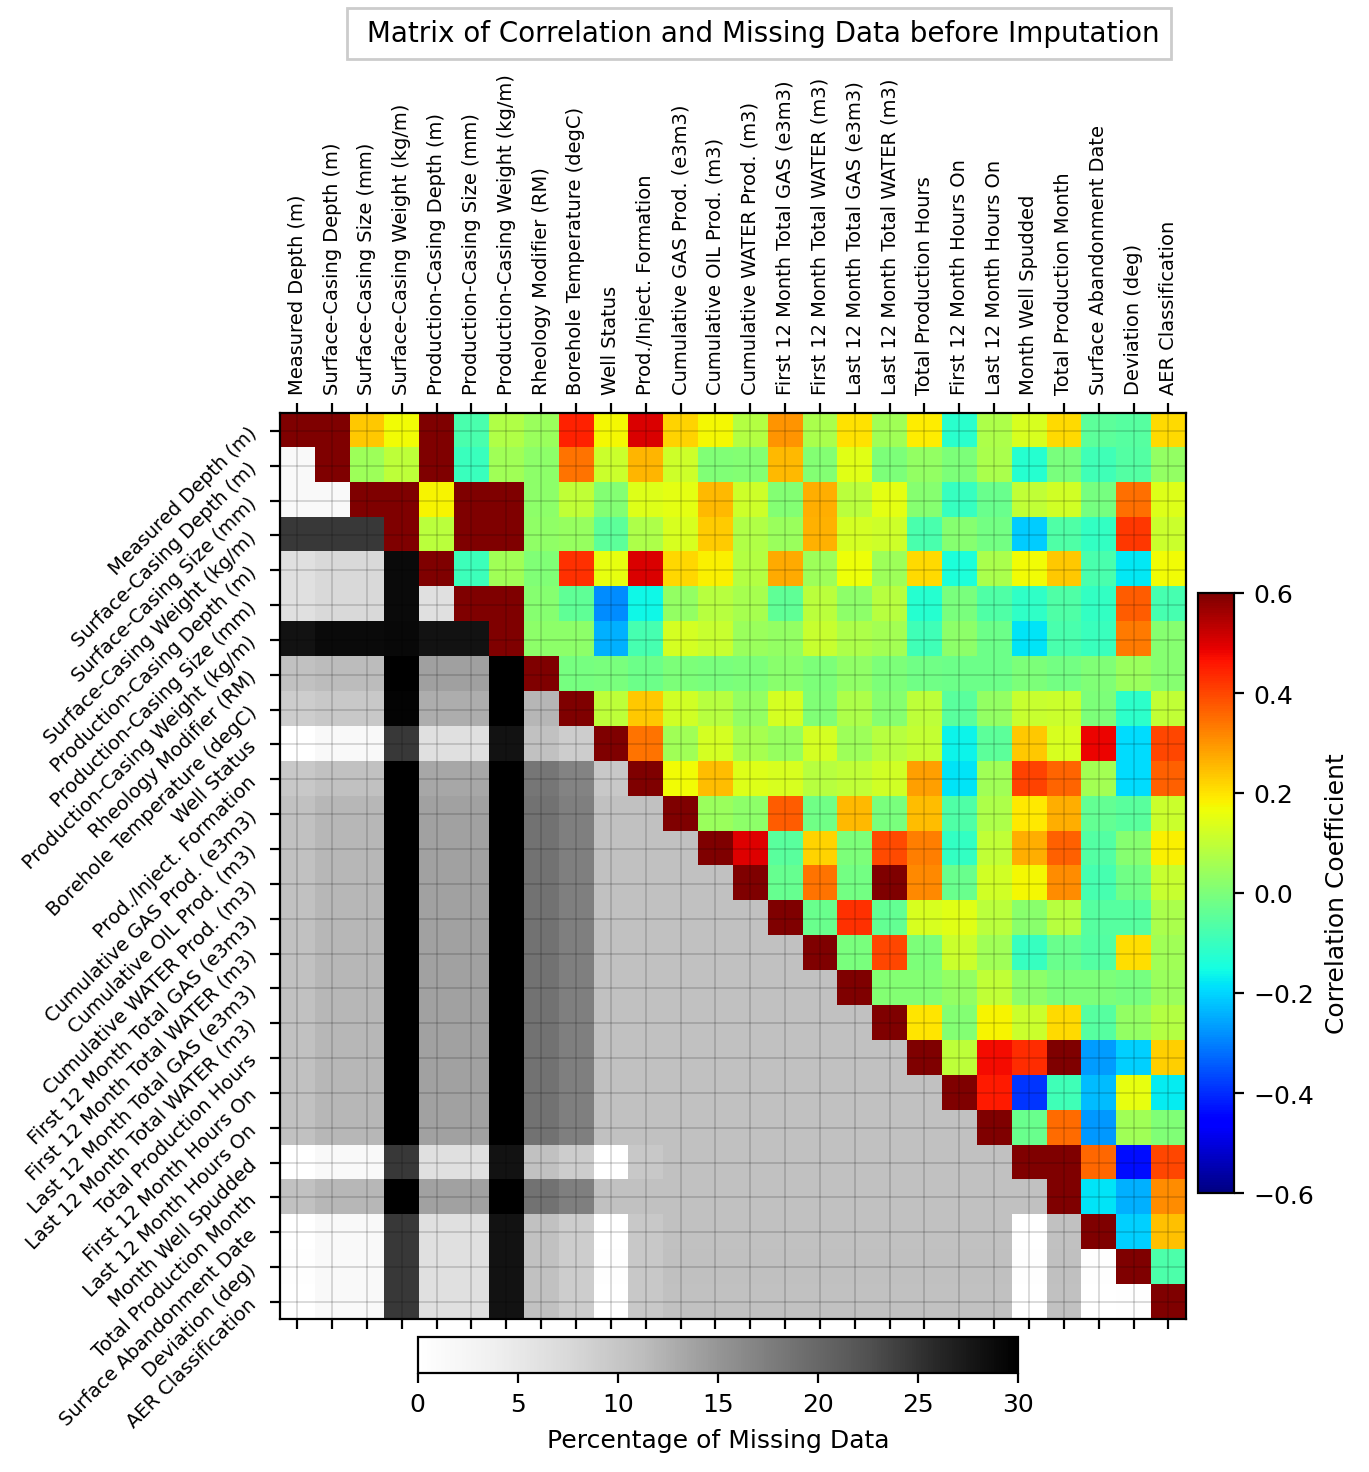

In [60]:
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(6, 6), dpi= 200, facecolor='w', edgecolor='k')

# Matrix of correlation between features excluding x and y
try:
    colmn.remove('Y Coordinate')
    colmn.remove('X Coordinate')
except ValueError :
    pass
#
im =ax.matshow(corr_nxy, cmap='jet', interpolation='nearest',vmin=-0.6, vmax=0.6)
#
cbaxes = fig.add_axes([0.9, 0.23, 0.03, 0.50]) 
fig.colorbar(im,cax=cbaxes,shrink=0.5,label='Correlation Coefficient')
ax.set_xticks(np.arange(len(corr_nxy)))
ax.set_xticklabels(colmn,fontsize=6, rotation='vertical')
ax.set_yticks(np.arange(len(corr_nxy)))
ax.set_yticklabels(colmn,fontsize=6)
ax.grid(color='k', linestyle='-', linewidth=0.1)

# Missing matrix between features excluding x and y
im =ax.matshow(Per_NaN, cmap='Greys', interpolation='nearest',vmin=0, vmax=30)
cbaxe_ = fig.add_axes([0.25, 0.08, 0.5, 0.030]) 
fig.colorbar(im,cax=cbaxe_,shrink=0.7,label='Percentage of Missing Data',orientation='horizontal')
ax.set_xticks(np.arange(len(Per_NaN)))
ax.set_xticklabels(colmn,fontsize=7, rotation='vertical')
ax.set_yticks(np.arange(len(Per_NaN)))
ax.set_yticklabels(colmn,fontsize=7,rotation=45)
ax.grid(color='k', linestyle='-', linewidth=0.1)
plt.text(-3,1110,' Matrix of Correlation and Missing Data before Imputation', 
         fontsize=10,bbox=dict(facecolor='white', alpha=0.2))
#fig.savefig('D:\Paper 6\Figures\Fig5.png', dpi=500, bbox_inches='tight')
plt.show() 

Since there are missing values in data set, correlation matrix is achieved by removing all missing value. Upper diagonal matrix shows the covariance between features. Instead of having the same covariance value, we assign percentage of missing data for lower diagonal covariance matrix. There are very high linear correlation between some features.  

# Imputation

Removing all missing values from data leads to remove valuable information that can have greatly reduce the performance of machine learning prediction. One naive imputation approach is to replace missing values with mean or median of the variable. However, this approach does not consider uncertainty in the data. There are other imputation techniques, but they are very expensive and time consuming for large datasets. 

We can apply bootstrapping technique to calculate uncertainty in the mean for each variable. Then, replace a missing value by randomly drawing a value from the distribution of the mean of that variable. This process can be repeated to impute all missing values. However, this approach does not respect the correlation between features since we randomly sample from distribution of the mean.

We propose [conditional LU simulation](https://link.springer.com/article/10.1007/BF00898189) for imputation that we can replace missing values by uncertainty in the mean and respecting the correlation between features after imputation.

In [62]:
# Cholesky decomposition to calculate lower matrix
# Assign random number seed
np.random.seed(42)
L=scipy.linalg.cholesky(corr, lower=True, overwrite_a=True)

# convert panda to numpy
x_=df_xy.to_numpy()
w=np.zeros((nsim,len(colm_)))
w_=np.zeros((len(colm_),nsim))
Final=zeros((len(df_xy),len(colm_)))

# Simulate uncorrelated Gaussian distribution (mean=0, s.d=1)
# for each variable
mu=0; sigma=1
for i in range(nsim):
    Dist = np.random.normal(mu, sigma, len(colm_))
    w[i,:]=Dist
    
# Conditional LU simulation: conditioning available data
# impute missing data while respecting the correlation between features.
for i in range(nsim):
    w__=[]; std_x_=[]
    for j in range(len(colm_)):
        if (math.isnan(ns_[i,j])):
            w__.append(w[i,j])
        else:
            ns_x=ns_[i,j]
            tmp=L[j,:]
            L_no0=tmp[tmp!=0]
            w_new=(ns_x-np.matmul(L_no0[0:j],w__))/L_no0[j]
            w__.append(w_new)
    tmp=(np.matmul(L,w__))            
    for k in range(len(tmp)):
        Final[i,k]=tmp[k]  

# Convert data to pandas dataframe       
pd_={}
for i in range(len(colm_)):
    pd_[colm_[i]]=Final[:,i]

pd_ns=pd.DataFrame(pd_,columns=colm_)  

## Correlation Matrix after Imputation 

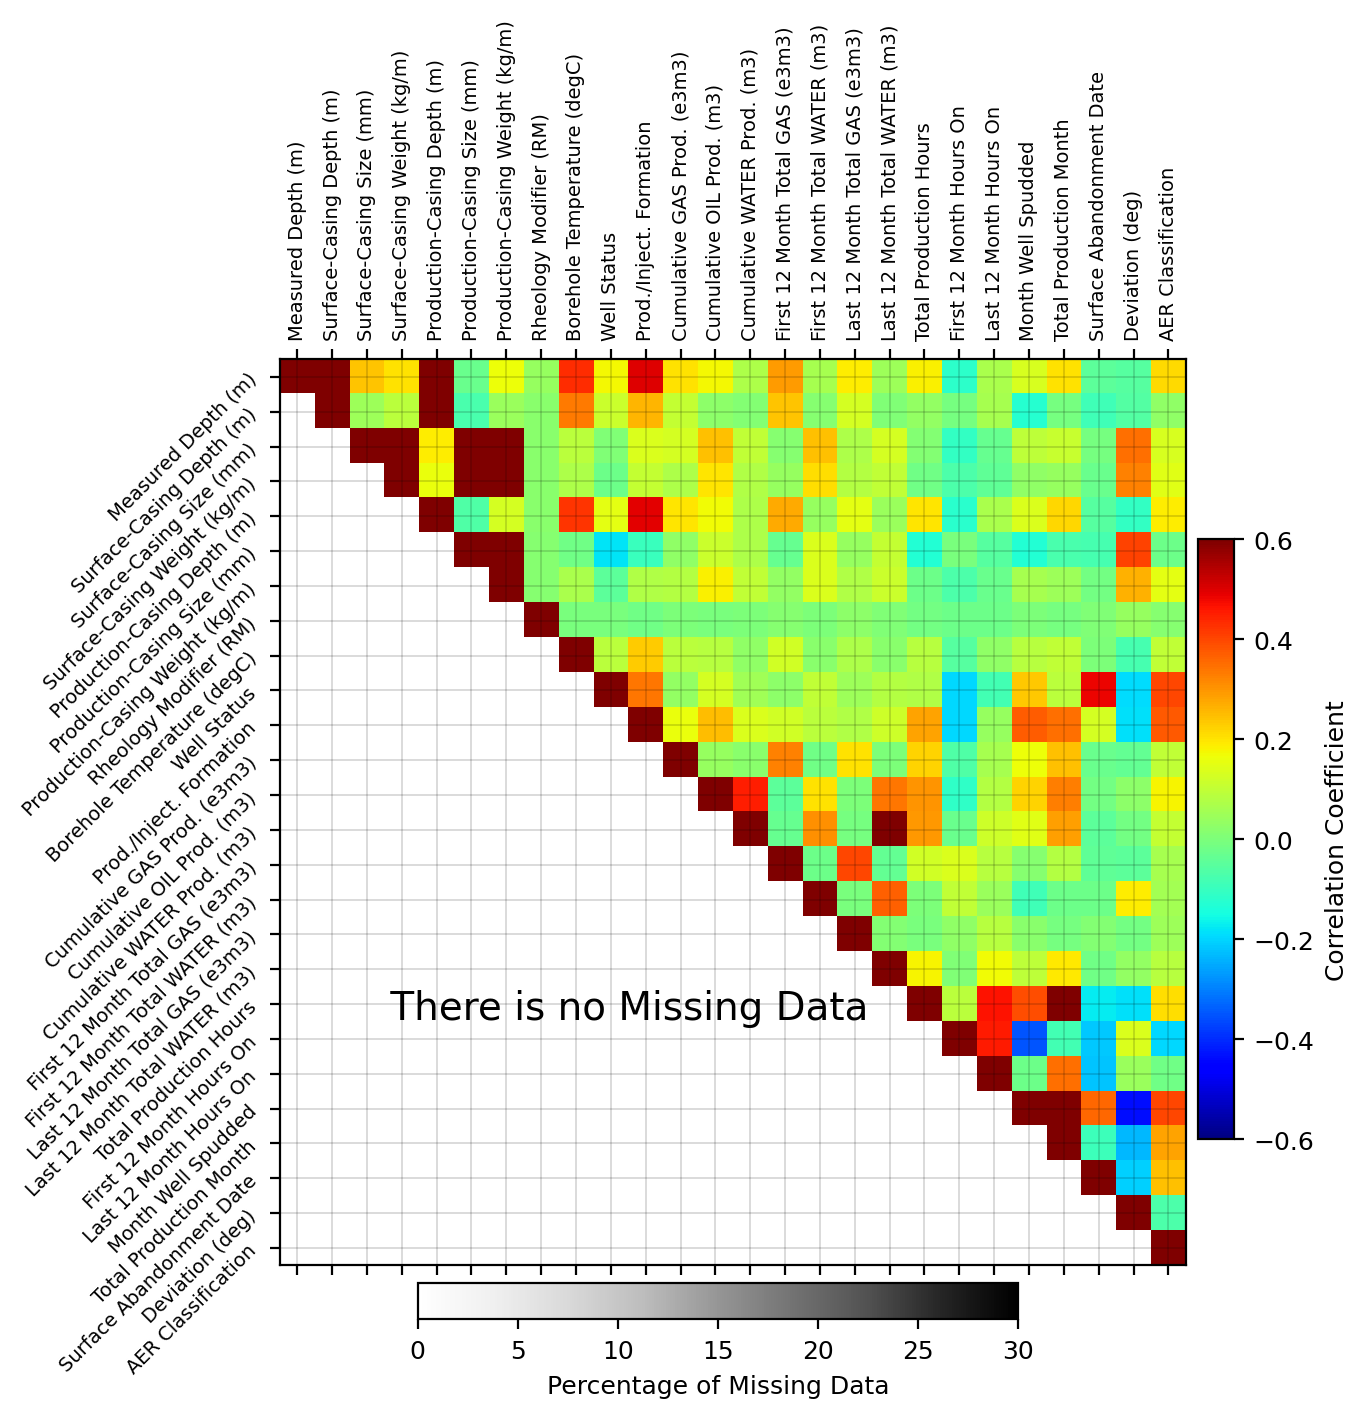

In [65]:
# Plot correlation matrix after imputation
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(6, 6), dpi= 200, facecolor='w', edgecolor='k')

# Matrix of correlation between features excluding x and y
try:
    colmn.remove('Y Coordinate')
    colmn.remove('X Coordinate')
except ValueError :
    pass
#
im =ax.matshow(corr___, cmap='jet', interpolation='nearest',vmin=-0.6, vmax=0.6)
#
cbaxes = fig.add_axes([0.9, 0.23, 0.03, 0.50]) 
fig.colorbar(im,cax=cbaxes,shrink=0.5,label='Correlation Coefficient')
ax.set_xticks(np.arange(len(corr___)))
ax.set_xticklabels(colmn,fontsize=6, rotation='vertical')
ax.set_yticks(np.arange(len(corr___)))
ax.set_yticklabels(colmn,fontsize=6)
ax.grid(color='k', linestyle='-', linewidth=0.1)

# Missing matrix between features excluding x and y
im =ax.matshow(Per_NaN_, cmap='Greys', interpolation='nearest',vmin=0, vmax=30)
cbaxe_ = fig.add_axes([0.25, 0.08, 0.5, 0.030]) 
fig.colorbar(im,cax=cbaxe_,shrink=0.7,label='Percentage of Missing Data',orientation='horizontal')
ax.set_xticks(np.arange(len(Per_NaN)))
ax.set_xticklabels(colmn,fontsize=7, rotation='vertical')
ax.set_yticks(np.arange(len(Per_NaN)))
ax.set_yticklabels(colmn,fontsize=7,rotation=45)
ax.grid(color='k', linestyle='-', linewidth=0.1)
#ax.title(' Matrix of Correlation and Missing \n Data before Imputation', fontsize=10,y=1.38)
#plt.text(-3,1055,' Matrix of Correlation and Missing Data After Imputation', 
#         fontsize=10,bbox=dict(facecolor='white', alpha=0.2))
plt.text(-2,250,' There is no Missing Data',fontsize=14)

#fig.savefig('D:\Paper 6\Figures\Fig6.png', dpi=500, bbox_inches='tight')
plt.show() 

# Get Training, Test Data and Holdout Data 

In [67]:
# Remove separate 'AER Classification' from dataset as target and remove 
# x 'X Coordinate' and y 'Y Coordinate' for only plotting

#Shuffle data again to avoid any artifact
np.random.seed(42)
df_xy_im=df_xy_im.reindex(np.random.permutation(df_xy.index))
df_xy_im.reset_index(inplace=True, drop=True)
columns_=list(df_xy_im.columns)
columns_RF=list(df_xy_im.columns)
columns_RF.remove('X Coordinate')
columns_RF.remove('Y Coordinate')
columns_RF.remove('AER Classification')
xind=columns_.index('X Coordinate')
yind=columns_.index('Y Coordinate')
#
class_=list(df_xy_im['AER Classification'])
df_xy_im.drop(['AER Classification'], axis=1, inplace=True)   
x=df_xy_im

# Convert training and target to numpy 
x= x.to_numpy()
y = np.int_(class_)
# Double check if there any missing value or not.
df_xy_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9196 entries, 0 to 9195
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Measured Depth (m)               9196 non-null   float64
 1   X Coordinate                     9196 non-null   float64
 2   Y Coordinate                     9196 non-null   float64
 3   Surface-Casing Depth (m)         9196 non-null   float64
 4   Surface-Casing Size (mm)         9196 non-null   float64
 5   Surface-Casing Weight (kg/m)     9196 non-null   float64
 6   Production-Casing Depth (m)      9196 non-null   float64
 7   Production-Casing Size (mm)      9196 non-null   float64
 8   Production-Casing Weight (kg/m)  9196 non-null   float64
 9   Rheology Modifier (RM)           9196 non-null   float64
 10  Borehole Temperature (degC)      9196 non-null   float64
 11  Well Status                      9196 non-null   float64
 12  Prod./Inject. Format

## Take 9.5% of Data for Test, 15% of Rest for Training and Validation

In [116]:
# Holdout some data for Test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.095, random_state=42)
for train_index, test_index in split.split(x, y):
    x_main,y_main = x[train_index],y[train_index]
    x_test ,y_test  = x[test_index],y[test_index]  
    
# Create train/test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(x_main, y_main):
    x_train,y_train = x_main[train_index],y_main[train_index]
    x_Validation ,y_Validation  = x_main[test_index],y_main[test_index]   

### Training Wells 

In [118]:
#Serious
x_1_Training=[x_train[:,xind][i]/1000 for i in range (len(x_train)) if y_train[i]==1]
y_1_Training=[x_train[:,yind][i]/1000 for i in range (len(y_train)) if y_train[i]==1]
count_1_Training=len(x_1_Training)

#Non Serious
x_2_Training=[x_train[:,xind][i]/1000 for i in range (len(x_train)) if y_train[i]==0]
y_2_Training=[x_train[:,yind][i]/1000 for i in range (len(y_train)) if y_train[i]==0]
count_0_Training=len(x_2_Training)

### Validation Wells 

In [119]:
#Serious
x_1_Validation=[x_Validation[:,xind][i]/1000 for i in range (len(x_Validation)) if y_Validation[i]==1]
y_1_Validation=[x_Validation[:,yind][i]/1000 for i in range (len(y_Validation)) if y_Validation[i]==1]
count_1_Validation=len(x_1_Validation)

#Non Serious
x_2_Validation=[x_Validation[:,xind][i]/1000 for i in range (len(x_Validation)) if y_Validation[i]==0]
y_2_Validation=[x_Validation[:,yind][i]/1000 for i in range (len(y_Validation)) if y_Validation[i]==0]
count_0_Validation=len(x_2_Validation)

### Test Wells 

In [120]:
#Serious
x_1_test=[x_test[:,xind][i]/1000 for i in range (len(x_test)) if y_test[i]==1]
y_1_test=[x_test[:,yind][i]/1000 for i in range (len(y_test)) if y_test[i]==1]
count_1_test=len(x_1_test)

#Non Serious
x_2_test=[x_test[:,xind][i]/1000 for i in range (len(x_test)) if y_test[i]==0]
y_2_test=[x_test[:,yind][i]/1000 for i in range (len(y_test)) if y_test[i]==0]
count_0_test=len(x_2_test)

## Remove x and y and Prepare Data for Machine Learning 

In [72]:
x_train=np.delete(x_train, xind,1)  # delete second column of x_train which is x
x_train=np.delete(x_train, xind,1)  # delete second column of deleted x_train which is y
###
x_Validation=np.delete(x_Validation, xind,1)  # delete second column of x_train which is x
x_Validation=np.delete(x_Validation, xind,1)  # delete second column of deleted x_train which is y
###
x_test=np.delete(x_test, xind,1)  # delete second column of x_train which is x
x_test=np.delete(x_test, xind,1)  # delete second column of deleted x_train which is y

In [73]:
# Standardize Test, Train and Validation Data

scaler = StandardScaler()
# Standardize Test data
std_x_test  = preprocessing.scale(x_test)

# Standardize Train data
std_x_train  = preprocessing.scale(x_train)

# Standardize Validation data
std_x_Validation  = preprocessing.scale(x_Validation)

In [74]:
# Allocate memory for accuracy, recall, precision and specificity
# We are using 14 classifiers
Test_Accu=zeros(14); Test_Rec=zeros(14);
Test_Pre=zeros(14);Test_Spe=zeros(14)

# Dummy (ie. random) Classifier

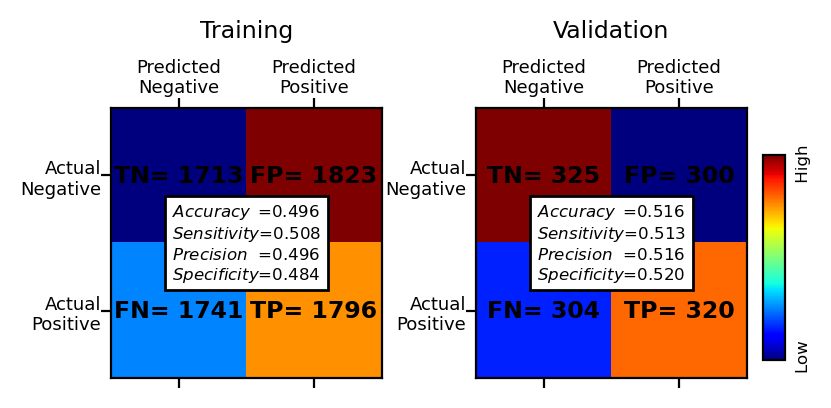

In [75]:
niter=1
p_dmy_clf=[]
for i in range (niter):
    dmy_clf = DummyClassifier()
    dmy_clf.fit(std_x_train,y_train)
    p_dmy_clf.append(dmy_clf)
# Apply predictor for training and validation
Tr_val_Report(p_dmy_clf,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

# Stochastic Gradient Decent 

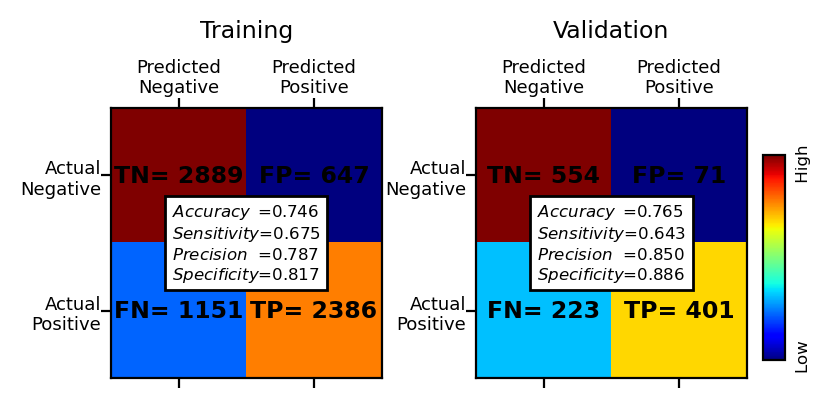

In [77]:
p_sgd=[]
for i in range (niter):
    sgd = SGDClassifier(loss='log')
    sgd.fit(std_x_train,y_train)
    p_sgd.append(sgd)
# Apply predictor for training and validation
Tr_val_Report(p_sgd,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

# Logistic Regression

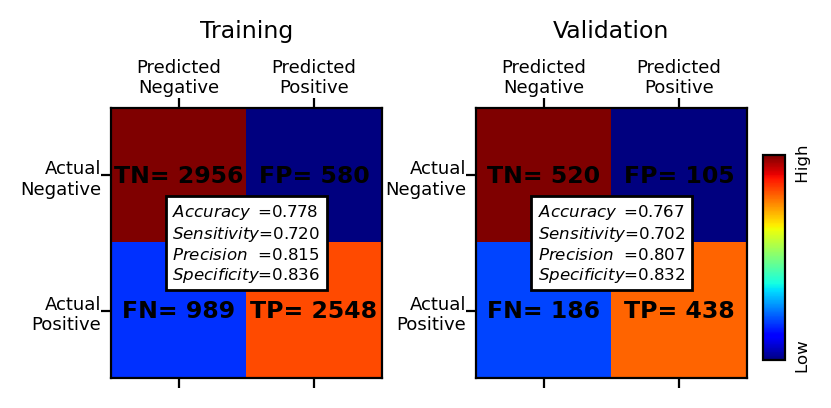

In [79]:
p_log_reg=[]
for i in range (niter):
    log_reg = LogisticRegression(solver="lbfgs")
    log_reg.fit(std_x_train,y_train)
    p_log_reg.append(log_reg)
# Apply predictor for training and validation
Tr_val_Report(p_log_reg,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

# Support Vector Machine (LinearSVC Class)

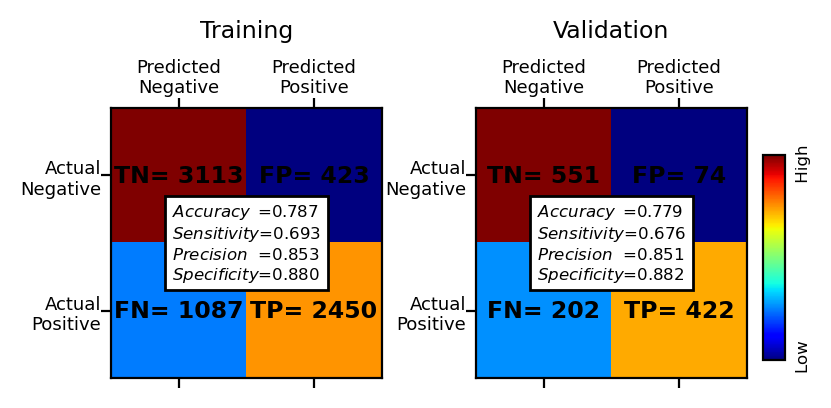

In [81]:
p_svm=[]
for i in range (niter):
    svm = LinearSVC(C=2,loss='hinge')
    svm.fit(std_x_train,y_train)
    p_svm.append(svm)

# Apply predictor for training and validation
Tr_val_Report(p_svm,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

# Decision Tree

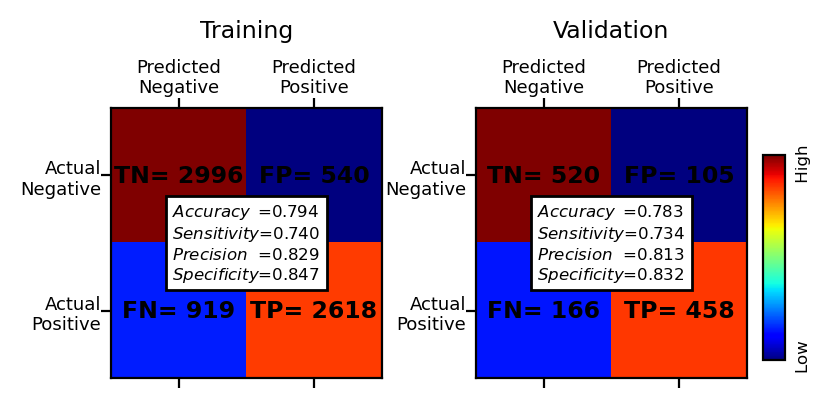

In [83]:
# Apply predictor for training and validation
p_trees=[]
for i in range (niter):
    estimator_tree_=DecisionTreeClassifier(max_depth=40, max_leaf_nodes=65, min_samples_leaf=5,
                       min_samples_split=71)
    estimator_tree_.fit(std_x_train,y_train)
    p_trees.append(estimator_tree_)
Tr_val_Report(p_trees,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

# Random Forest

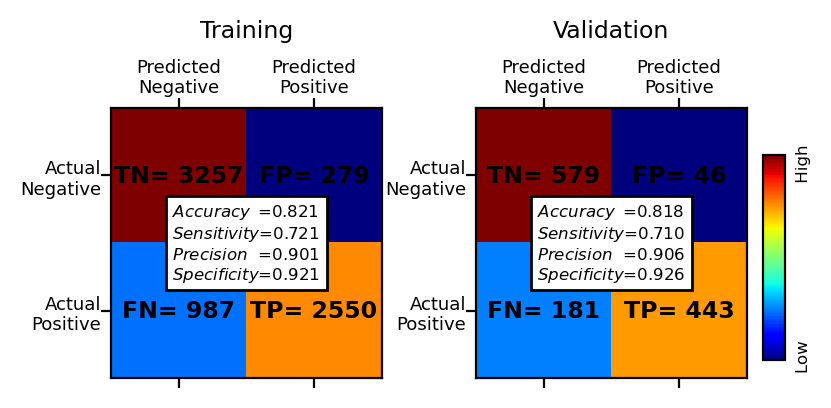

In [85]:
# Apply predictor for training and validation
p_rf=[]
for i in range (niter):
    estimator_rnf_=RandomForestClassifier(max_depth=40, max_leaf_nodes=65, min_samples_leaf=5,
                       min_samples_split=71)
    estimator_rnf_.fit(std_x_train,y_train)
    p_rf.append(estimator_rnf_)
Tr_val_Report(p_rf,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

## Importance of Features 

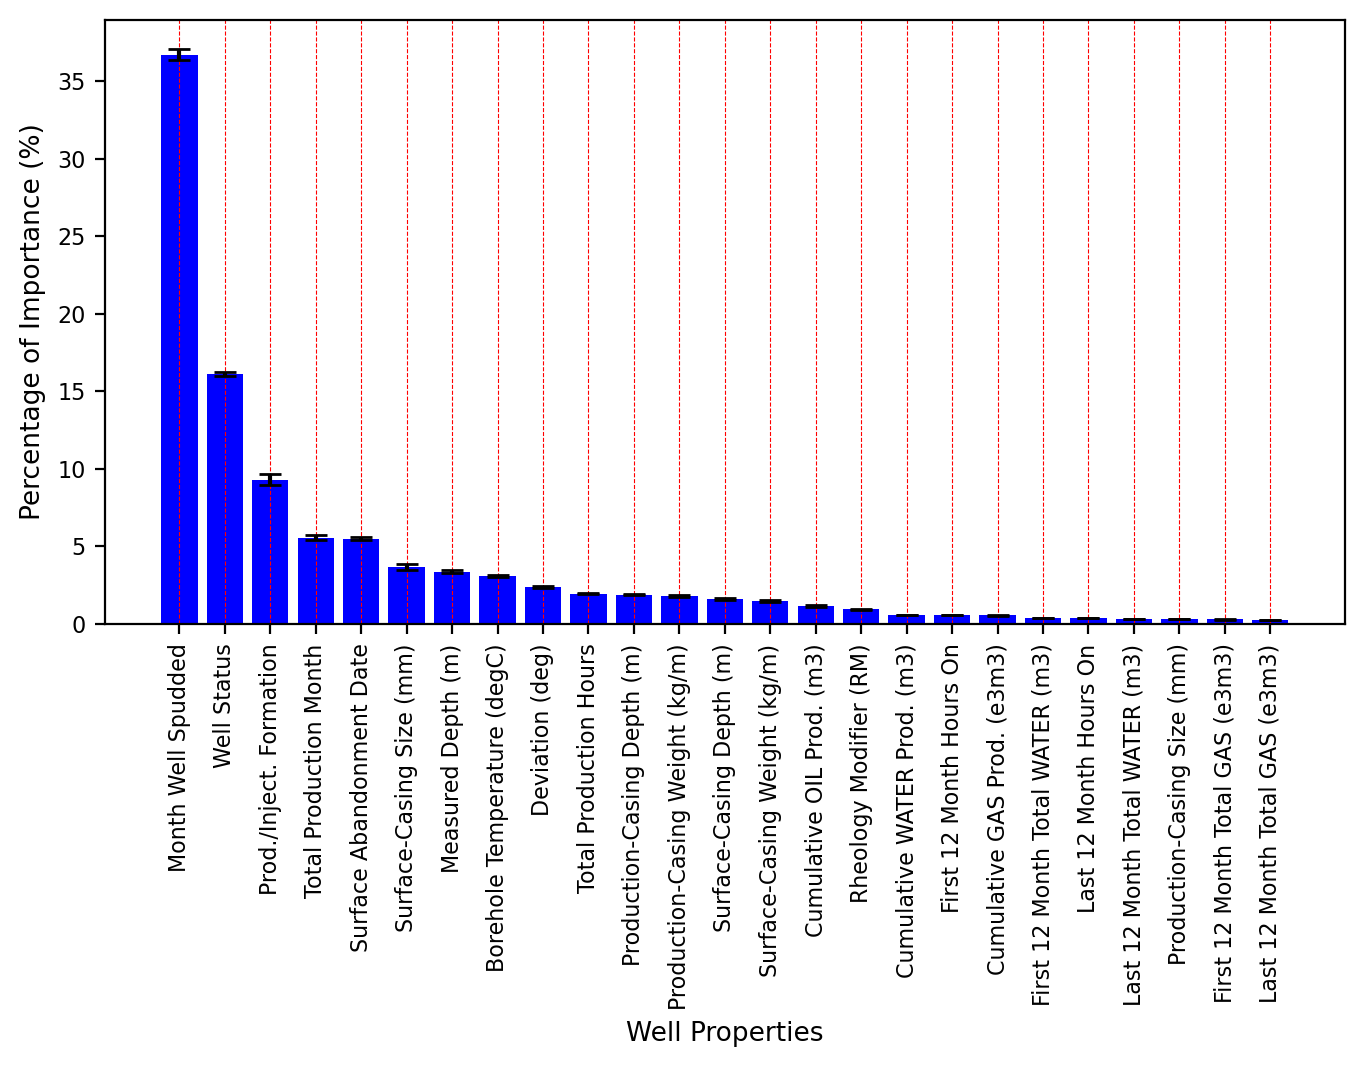

In [53]:
# Calculate mean and variance of importance features for all runs
mean_=[] ; sd_=[]       
col_=[]; val_=[]
for j in range(nsim):
    tmp=list_imp[j]
    tmp_val=[]; tmp_col=[]
    for k in range(len(columns_RF)):
        tmp_val.append(tmp[k][0]*100)
        tmp_col.append(tmp[k][1]) 
    col_.append(tmp_col)    
    val_.append(tmp_val)   
for k in range(len(columns_RF)):
    tmp=[]
    for i in range(nsim):
        ind=col_[i].index(columns_RF[k])
        tmp.append(val_[i][ind])
    mean_.append(np.mean(tmp))  
    sd_.append(np.sqrt(np.var(tmp)))
    
# Sort features based on the percentage of importance
sort_array_mean=np.sort(mean_, axis=0)
sort_array_mean=sort_array_mean[::-1]
sort_colms=[]
sort_sd_=[]
for i in range(len(sort_array_mean)):
    ind=mean_.index(sort_array_mean[i])
    sort_colms.append(columns_RF[ind])
    sort_sd_.append(sd_[ind])
        
#
font = {'size'   : 8}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k')
index1 = np.arange(len(sort_colms))
ax1.bar(index1, sort_array_mean,yerr=sort_sd_, align='center', alpha=1, ecolor='black', capsize=4,color='b')
ax1.set_xlabel('Well Properties',fontsize='9.5')
ax1.set_ylabel('Percentage of Importance (%)',fontsize='9.5')
ax1.set_xticks(np.arange(len(columns_RF)))
ax1.set_xticklabels(sort_colms,fontsize=8, rotation=90)     
ax1.xaxis.grid(color='r', linestyle='--', linewidth=0.4) 
plt.show()   

# Adaptive Boosting (AdaBoost) 

## Logistic Regression 

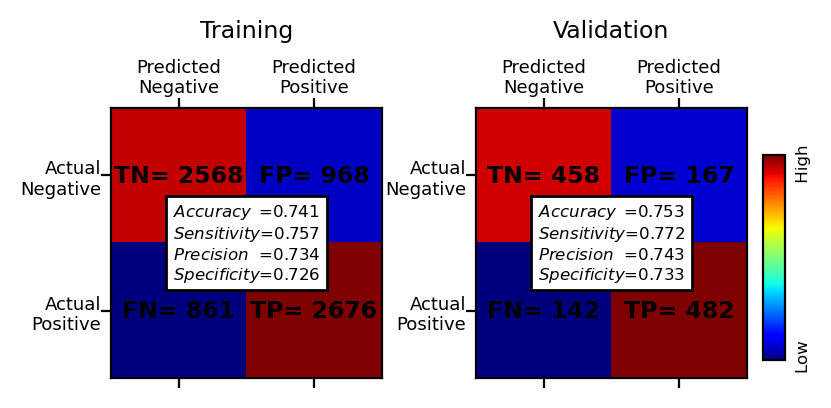

In [87]:
p_ada_log_reg=[]
for i in range (niter):
    ada_log_reg = AdaBoostClassifier(
    log_reg, n_estimators=100,algorithm="SAMME", learning_rate=0.5)
    ada_log_reg.fit(std_x_train,y_train)
    p_ada_log_reg.append(ada_log_reg)
# Apply predictor for training and validation
Tr_val_Report(p_ada_log_reg,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

## Support Vector Machine 

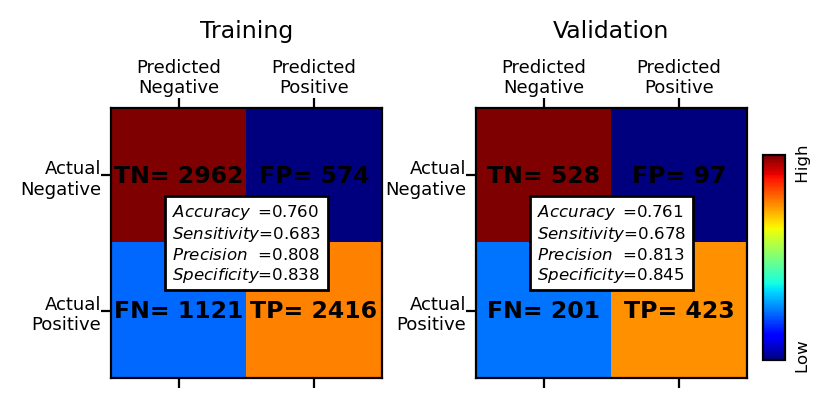

In [89]:
p_ada_svm=[]
for i in range (niter):
    ada_svm = AdaBoostClassifier(
    svm, n_estimators=100,algorithm="SAMME", learning_rate=0.5)
    ada_svm.fit(std_x_train,y_train)
    p_ada_svm.append(ada_svm)
# Apply predictor for training and validation
Tr_val_Report(p_ada_svm,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

## Decision Trees

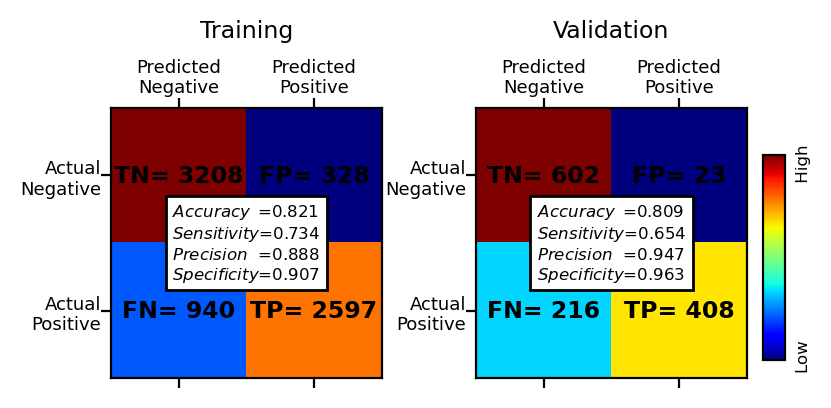

In [91]:
p_ada_tree=[]
for i in range (niter):
    ada_tree = AdaBoostClassifier(
    estimator_tree_, n_estimators=100,algorithm="SAMME", learning_rate=0.1)
    ada_tree.fit(std_x_train,y_train)
    p_ada_tree.append(ada_tree)
# Apply predictor for training and validation
Tr_val_Report(p_ada_tree,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

## Random Forest

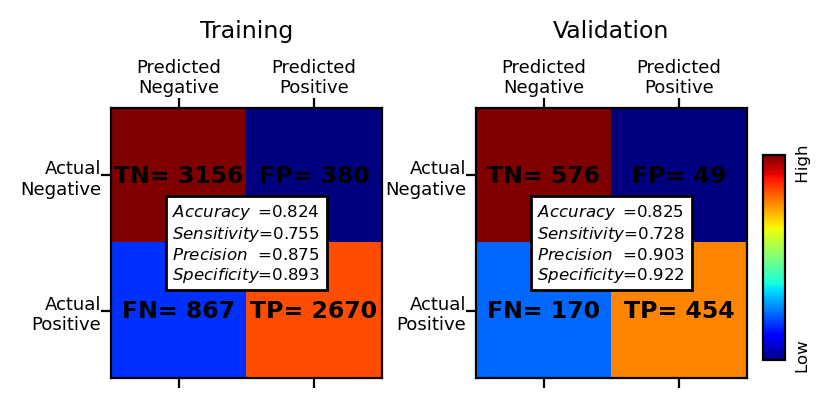

In [93]:
p_ada_rnf=[]
for i in range (niter):   
    ada_rnf = AdaBoostClassifier(
    estimator_rnf_, n_estimators=20,algorithm="SAMME", learning_rate=0.1)
    ada_rnf.fit(std_x_train,y_train)
    p_ada_rnf.append(ada_rnf)    
# Apply predictor for training and validation
Tr_val_Report(p_ada_rnf,niter,std_x_train,y_train,std_x_Validation,y_Validation,False)

# Deep Neural Network

## Optimum Hyperparameters

In [59]:
####### This cell may take a couple of hours to find optimum hyperparameters ####### 

# define the grid search parameters: different optimizers, initialization, and number of neurons
param_grid = {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
             'init_mode' : ['uniform', 'lecun_uniform','lecun_normal', 'glorot_normal',
             'glorot_uniform', 'he_normal', 'he_uniform'],'neurons' : [20, 50, 100]}

# Run Keras Classifier 
model = KerasClassifier(build_fn=DeepLearning_GridSearch); model. _estimator_type = "classifier"

# Apply Scikit Learn GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2,scoring='f1')

# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3,patience=5, verbose=0, mode='auto')
grid_result = grid.fit(std_x_train,y_train,batch_size=32,validation_data=
                       (std_x_Validation,y_Validation),callbacks=[monitor],
                   verbose=0,epochs=1000)

# Define best hyperparameters
predictor=grid_result.best_estimator_

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [95]:
# Fit Neural Network model wih optimum parameters
def DeepLearning ():
    """ Function to run Neural Network for optimum hyperparameters"""
#    np.random.seed(42)
#    tf.random.set_seed(42)
    nerouns=200; dropout=0.15
    activation="relu"; kernel_initializer="he_normal"; 
    optimizer= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(nerouns, input_dim=std_x_train.shape[1], activation=activation
                                 , kernel_initializer=kernel_initializer))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(nerouns, activation=activation))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(nerouns, activation=activation))      
    model.add(keras.layers.Dropout(dropout))     
    
    model.add(keras.layers.Dense(1,activation='sigmoid')) # Output
    model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["acc"])
    return model
#
p_DNN=[]
history_=[]
for i in range (niter):   
    model = KerasClassifier(build_fn=DeepLearning)
    model. _estimator_type = "classifier"
    monitor= keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3,patience=5, verbose=1, mode='auto')
    history= model.fit(std_x_train,y_train,batch_size=64,validation_data=(std_x_Validation,y_Validation),
                       callbacks=[monitor],verbose=0,epochs=1000)
    history_.append(history)
    p_DNN.append(model) 

Epoch 00014: early stopping


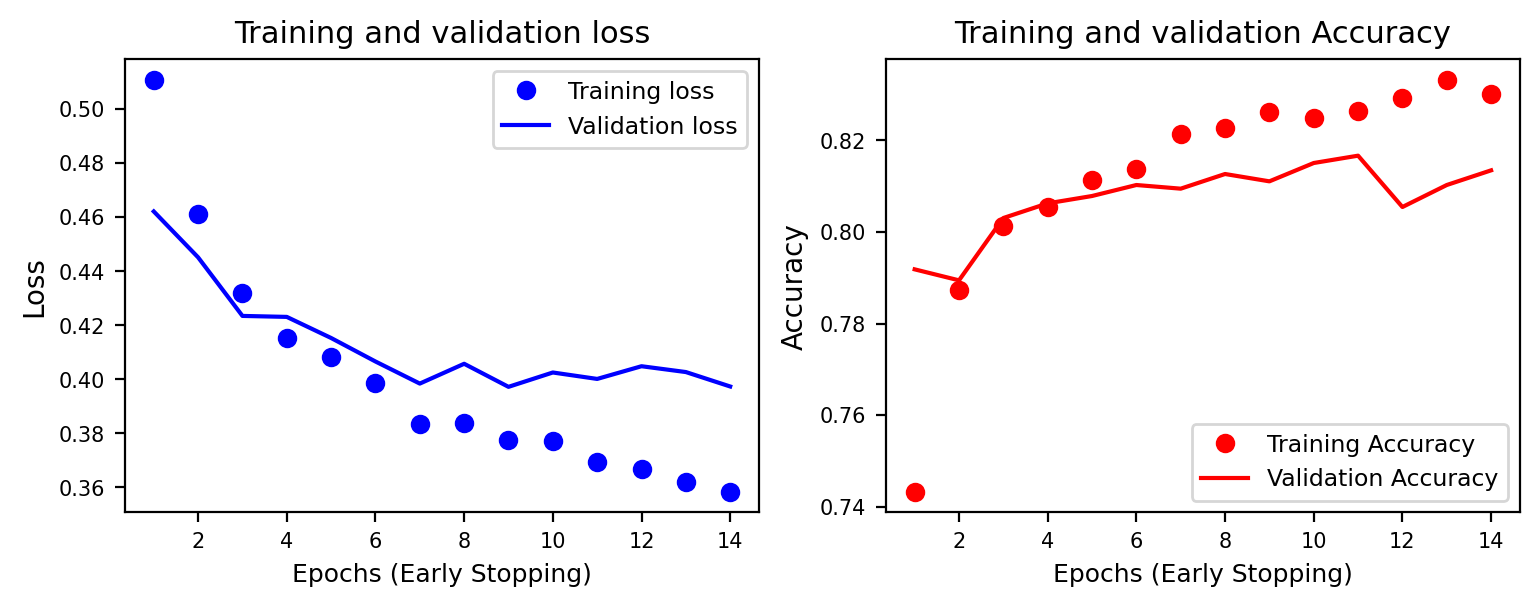

In [99]:
# Summary of parameters and plotting
plot_NN(history)

# Ensemble 

## Hard Voting

In [101]:
# Hard voting for some promissing classifier
p_voting_clf_h=[]
for i in range (niter):
    voting_clf_h = VotingClassifier(
    estimators=[('ada_log_reg',p_ada_log_reg[i]),('ada_svm',p_ada_svm[i])
                ,('ada_rnf', p_ada_rnf[i]),('NN',p_DNN[i])],voting='hard')
    voting_clf_h.fit(std_x_train,y_train)
    p_voting_clf_h.append(voting_clf_h)

Train on 7073 samples
7073/7073 [==============================] - 3s 409us/sample - loss: 0.5042 - acc: 0.7601


## Soft Voting 

In [103]:
# Soft voting classifier for some promissing classifiers
p_voting_clf_s=[]
for i in range (niter):  
    voting_clf_s = VotingClassifier(
    estimators=[('ada_log_reg',p_ada_log_reg[i]),('ada_svm',p_ada_svm[i])
                ,('ada_rnf', p_ada_rnf[i]),('NN',p_DNN[i])],voting='soft')
    voting_clf_s.fit(std_x_train,y_train)
    p_voting_clf_s.append(voting_clf_s)

Train on 7073 samples
7073/7073 [==============================] - 3s 424us/sample - loss: 0.4987 - acc: 0.7596


## Stacking (stacked generalization) 

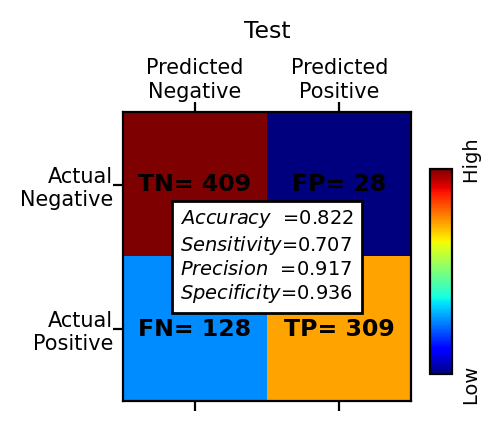

In [105]:
# Selecet five promissing estimator that have been trained befor
p_stacking=[]; p_x_test_predictions=[]
for i in range (niter):
    estimators=[p_ada_log_reg[i],p_ada_svm[i],p_ada_rnf[i],p_DNN[i]]   
    x_Validation_Predictions = zeros((len(std_x_Validation), len(estimators)), dtype=np.float32)
    
    # Apply estimators on Validation data set
    for index, estimator in enumerate(estimators):
        x_Validation_Predictions[:, index] = np.ravel(estimator.predict(std_x_Validation))
    
    # Train a random forest as blender on predictions of the five selected estimators
    rnf = RandomForestClassifier(max_depth=29, max_leaf_nodes=91, min_samples_leaf=22,
                           min_samples_split=48)
    rnf.fit(x_Validation_Predictions, y_Validation)
    
    # Test the blender on holdout (test) data
    x_test_predictions = np.zeros((len(std_x_test), len(estimators)), dtype=np.float32)
    for index, estimator in enumerate(estimators):
        x_test_predictions[:, index] = np.ravel(estimator.predict(std_x_test))
        
    p_x_test_predictions.append(x_test_predictions)    
    p_stacking.append(rnf)   

# Final Plot

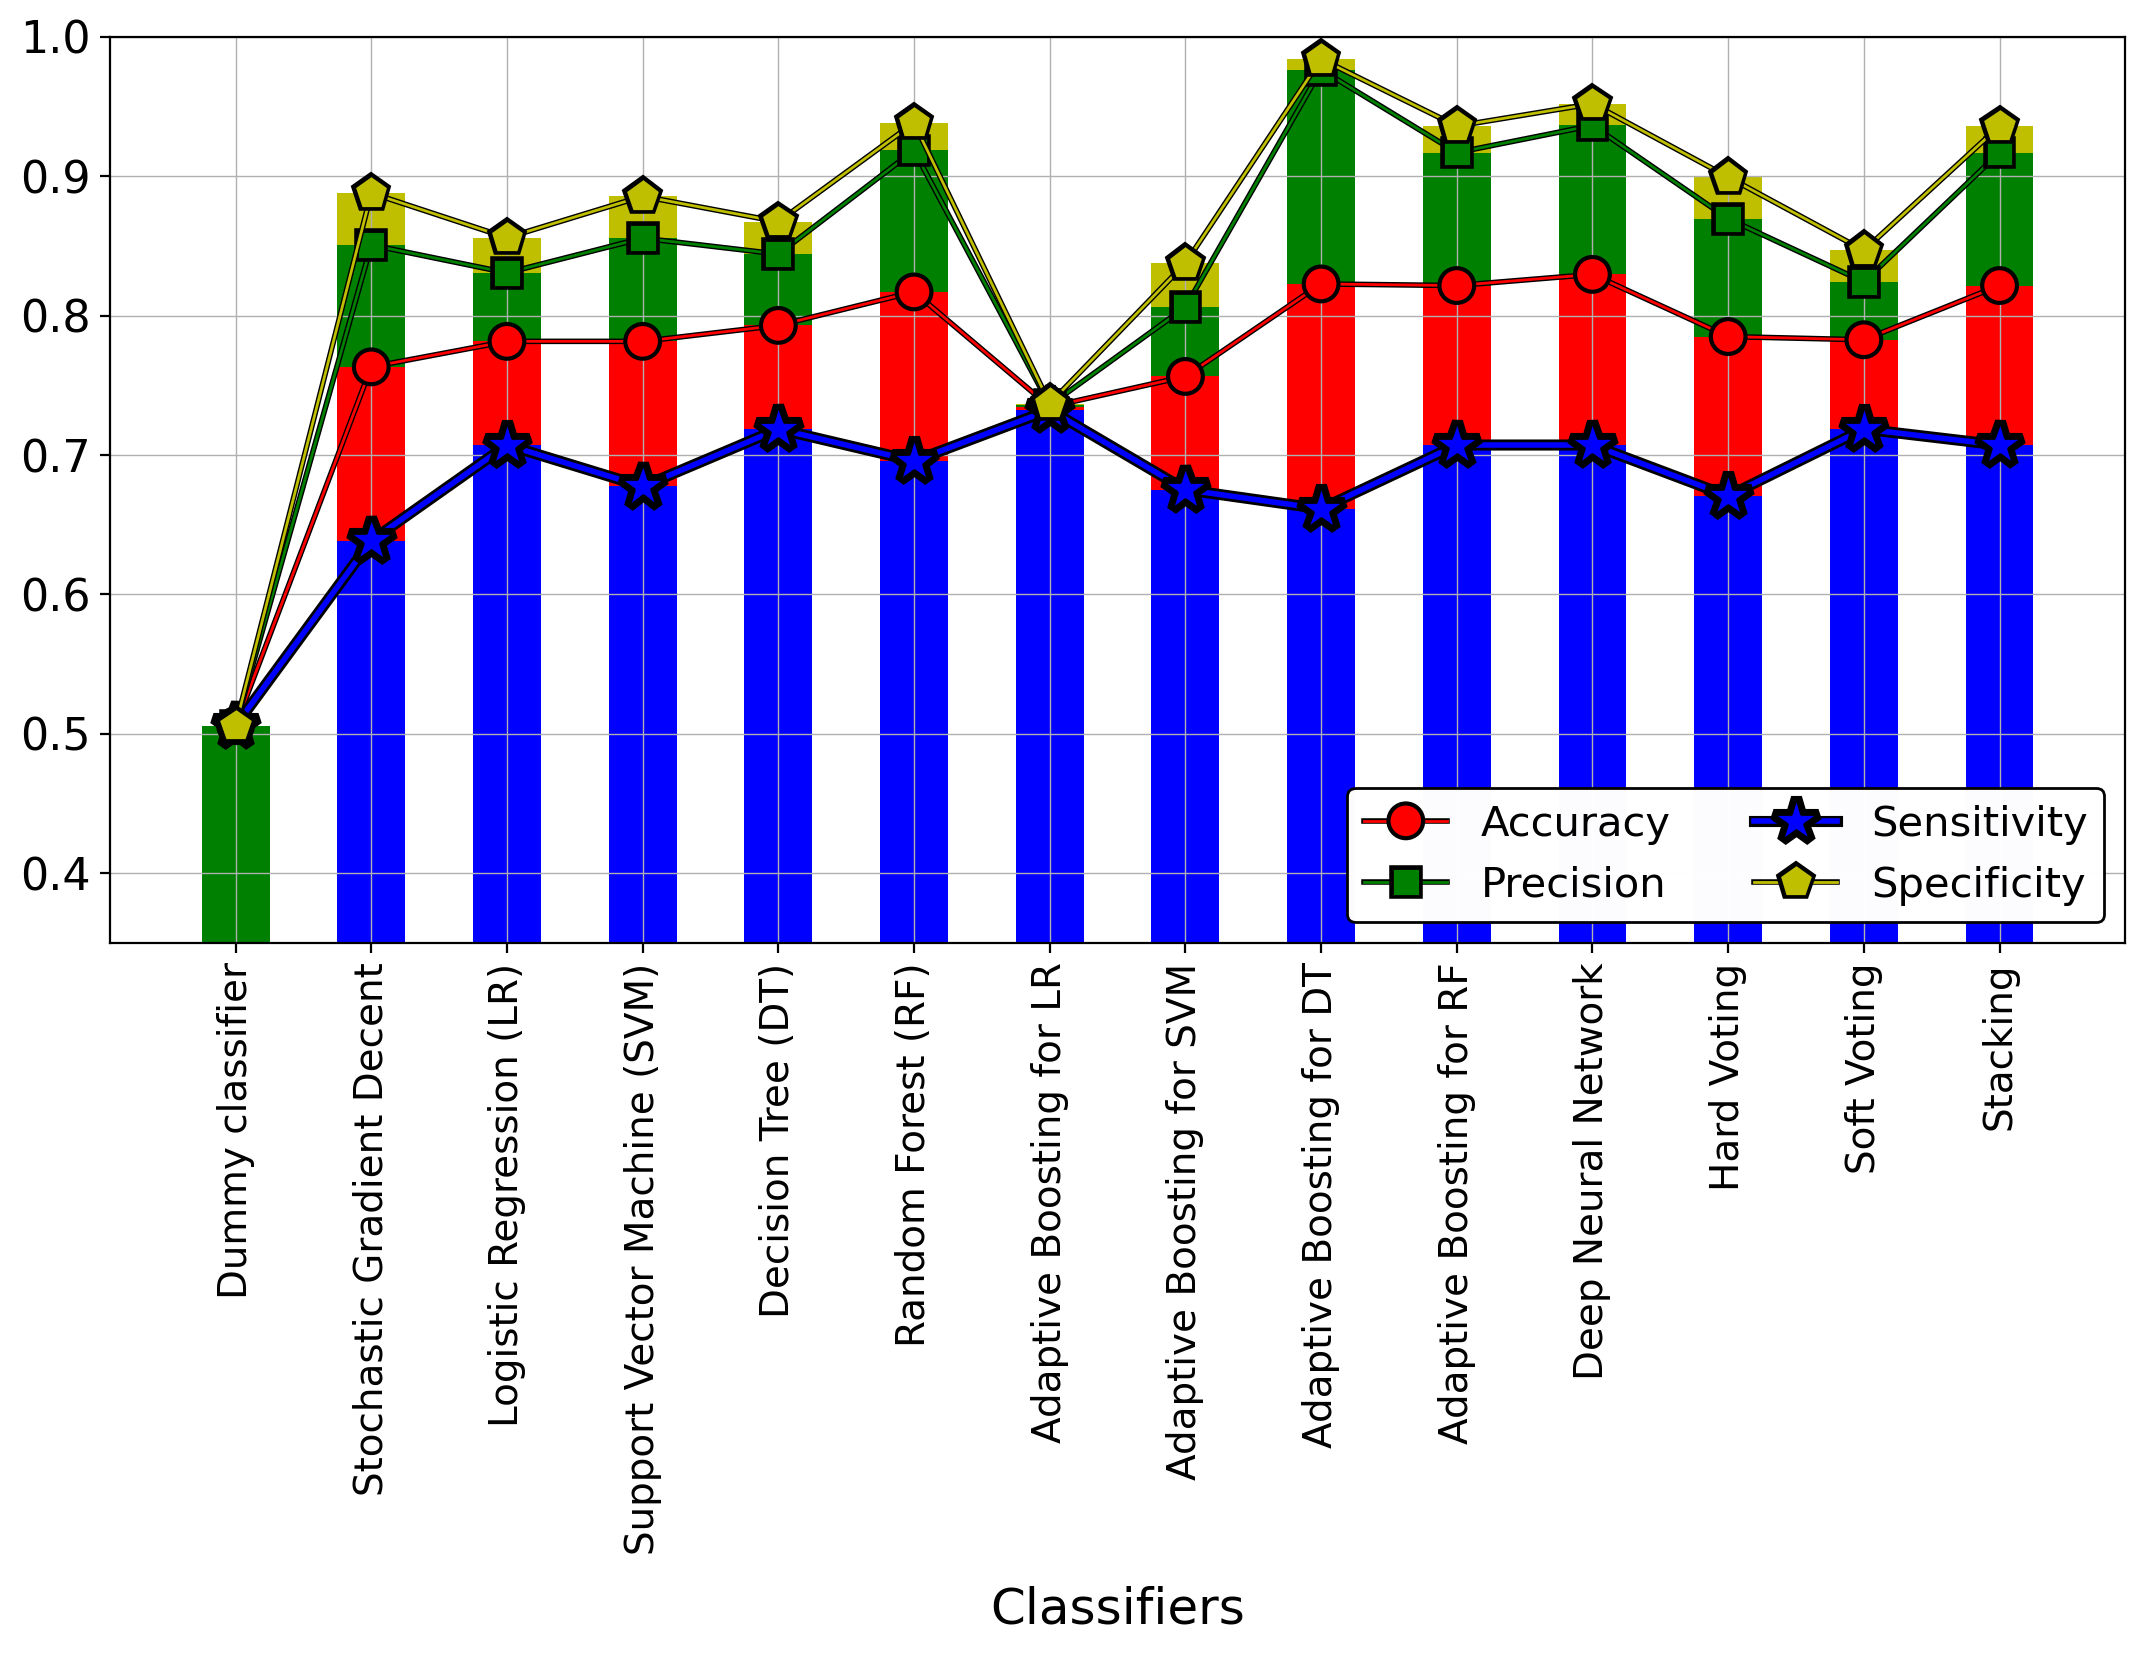

In [115]:
font = {'size'   :16 }
matplotlib.rc('font', **font)
#
# Predictors used in this work

Predictor=["Dummy classifier","Stochastic Gradient Decent","Logistic Regression (LR)",
           "Support Vector Machine (SVM)","Decision Tree (DT)","Random Forest (RF)","Adaptive Boosting for LR" ,
           "Adaptive Boosting for SVM" ,"Adaptive Boosting for DT" 
           ,"Adaptive Boosting for RF","Deep Neural Network","Hard Voting","Soft Voting","Stacking"]

fig=plt.figure(figsize=(13, 6), dpi= 200, facecolor='w', edgecolor='k')

plt.plot(Predictor,Test_Accu,'ro-',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],
                                                             markersize=12,label='Accuracy',markeredgecolor='k')
plt.plot(Predictor,Test_Pre,'gs-',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],
                                                             markersize=10,label='Precision',markeredgecolor='k') 
plt.plot(Predictor,Test_Rec,'b*-',linewidth=2,path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()],
                                                             markersize=17,label='Sensitivity',markeredgecolor='k') 
plt.plot(Predictor,Test_Spe,'yp-',linewidth=1,path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()],
                                                           markersize=13,label='Specificity',markeredgecolor='k')     
#
color=['g','r','y','b']; alpha=1; Test_Arr=[]
Test_Arr.append(Test_Accu); Test_Arr.append(Test_Pre)
Test_Arr.append(Test_Rec); Test_Arr.append(Test_Spe) 
arra=zeros((4,len(Test_Accu))); color_list=[]
#
for i in range(len(Test_Accu)):
    ind=[]
    val=Test_Accu[i],Test_Pre[i],Test_Rec[i],Test_Spe[i]
    aa=np.array(val)
    ind=list((-aa).argsort())
    tmp=[]
    for j1 in range(4):
        arra[j1,i]= Test_Arr[ind[j1]][i]
        tmp=[color[ind[j1]]]+tmp
    color_list.append(tmp)
for i in range(len(Test_Accu)):    
    for j in range(4):
        plt.bar(Predictor[i],arra[j,i], align='center',width=0.5, alpha=alpha, ecolor='black',
                capsize=1,color=color_list[i][j])

plt.grid(True,which="both",ls="-",linewidth=0.5)
plt.xlabel('Classifiers',fontsize='18', labelpad=11)
#plt.ylabel('Accuracy, Sensitivity, \n Precision & Specificity ',fontsize='17')
plt.xticks(rotation=90, fontsize=14)
#legend=plt.legend(ncol=2,bbox_to_anchor=(0.64025, 0.15),fontsize='13',framealpha =3) 
legend=plt.legend(ncol=2,loc=4,fontsize='15',framealpha =3) 
legend.get_frame().set_edgecolor("black")
plt.ylim((0.35, 1))  
plt.show()
#save='D:\Paper 6\Figures\Fig13.pdf'
#fig.savefig(save, dpi=500, bbox_inches='tight')